# How to Not Go Broke Betting on Sports
by Casey Durfee      
Copyright 2025

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(2718)

The best way to not go broke on betting is to reduce your bet size to zero. Scared money don't lose none.

It is impossible to escape randomness in sports betting. Any time you decide to bet, you enter its kingdom and have to abide by its laws. This is a pretty hard thing for us to know how to deal with, when our brains are pattern-finding machines. Even for fairly rational people, there are seeming paradoxes that emerge where you're dealing with enough random data.

## March Madness

The NCAA holds the March Madness tournament every year to determine who the best college basketball team is. It's a single elimination tournament of 64 teams, arranged into a big bracket.

Say we do a March Madness style bracket with coin flippers instead of basketball teams. We randomly assign them places in the bracket. For each matchup, the coin flipper at the top of the matchup flips a coin. If they get heads, they survive and advance. If they get tails, they lose.

Somebody's going to go 7-0 and win that tournament, right?

Imagine we expanded that to every single person on the planet. Every single person gets matched up into a 64 person march madness brackets, then each of those winners get added to another 64 team bracket, and so on. 

Eventually, someone is going to emerge the victor with a 33-0 record -- the greatest coin flipper in the world.

Right?

## Maximizing Profits: Kelly Criterion

Let's assume a bettor really does have an edge over the house -- they can beat the spreads on NBA basketball 56% of the time.

Even with that advantage, it's easy to go broke if you bet too much at once. Suppose they bet 25% of their bankroll on each bet.  What happens after 200 bets?  200 bets is not a lot, roughly 1 month of NBA games if they bet on every game.

In [3]:
RUNS = 100000
BETS = 200
WIN_PCT = .56
BET_SIZE = .25
VIG = 1.1

def simulate_bankroll():
    print(f"simulating {BETS} bets at win percent {WIN_PCT}, vig {VIG}, bet size {BET_SIZE:.3f}\n")
    results = []
    for run in range(RUNS):
        bankroll = 100
        for bet_count in range(BETS):
            result = rng.random()
            if result < WIN_PCT:
                ## we won!
                bankroll = bankroll + (BET_SIZE * bankroll)
            else:
                ## we lost =(
                bankroll = bankroll - (VIG * BET_SIZE * bankroll)
        results.append(bankroll)
    return pd.Series(results)

def simulation_report(results):
    times_broke = sum(results < 5)
    print(f"Simulating {RUNS} times")
    print(f"We went broke {100 *times_broke / RUNS}% of the time")
    print(f"Best result {max(results):,}, Worst {min(results)}, \nmean {results.mean():,}, median {results.median():,} ")

In [4]:
results = simulate_bankroll()
simulation_report(results)

simulating 200 bets at win percent 0.56, vig 1.1, bet size 0.250

Simulating 100000 times
We went broke 52.624% of the time
Best result 45,795,860.97212911, Worst 1.6979849461764437e-07, 
mean 4,650.88830357692, median 3.6615589888655578 


### You know I'm only in it for the gold

[TODO: rewrite this. voice, etc]

I've defined "going broke" as being down to less than 5% of the original bankroll, which I will also call ruin. Mathematicians can be emo with their vocabulary -- surprise, loss, regret and ruin are all technical terms.

Once in a blue moon we end up a big winner, but most of the time we're left with less than 5% of our bankroll after 200 bets even though we have advantage. So it's still a game of chance rather than skill, even though it would require a lot of mental labor to make the picks, and time to actually bet the picks. The mean rate of return is quite impressive, but the median result is bankruptcy.

Intuitively, there has to be some connection between the betting advantage and the optimal amount to risk on each bet. If you only have a tiny advantage, you should only be making tiny bets. The better you are, the more you can risk. And if you have no advantage, you shouldn't bet actual money.

That intuition is correct. https://en.wikipedia.org/wiki/Kelly_criterion

Let's see what happens when we bet the amount recommended by the Kelly criterion.

In [5]:
p = WIN_PCT
q = 1 - WIN_PCT
b = 1 / VIG 

BET_SIZE = p - (q/b)

results = simulate_bankroll()
simulation_report(results)


simulating 200 bets at win percent 0.56, vig 1.1, bet size 0.076

Simulating 100000 times
We went broke 0.113% of the time
Best result 20,810.24527352384, Worst 1.879750165631289, 
mean 318.29236584004065, median 168.44629945083318 


That's a lot better. But notice how we can still go broke around 1 time in 1000! This is in just a month of betting what is supposed to be the optimal way.

Maybe if we do more bets with Kelly betting, we'll reduce the risk. That would be a reasonable assumption, right? It should make things less volatile and allow the player's advantage over the house with every bet to shine through.

In [6]:
BETS = 1000

results = simulate_bankroll()
simulation_report(results)

simulating 1000 bets at win percent 0.56, vig 1.1, bet size 0.076

Simulating 100000 times
We went broke 1.39% of the time
Best result 87,797,780.80832939, Worst 0.002598230795753785, 
mean 33,119.88771344828, median 1,356.1488894193767 


In [ ]:
1.39 /.113

10.653846153846153

<span class="tex2jax_ignore">The median outcome is turning $100 into $1356, which is a sweet rate of return.</span>  But the chances of going broke actually increased! The player will go broke about 11x more often on 1000 bets than 200, which seems unfair, but we're in the kingdom of randomness.

The Kelly criterion doesn't make any guarantees about not going broke. It just offers the best way to optimize the expected value.

In the real world, I think a rational bettor would have a strategy to regularly take profits, while still getting most of the exponential growth offered by the Kelly criterion. It feels like it should be possible to guarantee profits almost all of the time (given a certain level of skill), by taking money out at regular intervals. Take 1/4 out each time the bankroll doubles or something like that. It would be fun to model, but I won't do that now. (Someone far smarter than me has probably already worked out the ideal solution, for some definition of "ideal". In which case I'm guessing it's like, take $1/2\pi$ out, every time the bankroll increases by a factor of $e$.)

### Partial Kelly Betting

Remember, to make this work, the player has to have an advantage over the house, know the exact size of the advantage, and consistently bet the right amounts. 

Kelly Betting is the optimal way to maximize profits, but what about lower stakes? The real power of Kelly betting is its compounding nature -- as the bankroll gets bigger or smaller, the bet size scales up or down as well.

Here's what happens when we Kelly bet 2% of our bankroll.

In [8]:
BET_SIZE = .02
BETS = 1000

results = simulate_bankroll()
simulation_report(results)

simulating 1000 bets at win percent 0.56, vig 1.1, bet size 0.020

Simulating 100000 times
We went broke 0.0% of the time
Best result 5,894.394697860402, Worst 21.05827238773966, 
mean 457.9316935414564, median 367.4449586401224 


[FIXME: is rate of return right]

We didn't go broke in 100,000 simulations. Not bad. Mean rate of return on 1000 bets is 4.6x, and the median is 3.7x. So most of the time, it is a nice return on investment.

We still lost money 2.6% of the time, though. Being conservative, betting a lot of games at positive expected value, and betting the right way greatly increase the chances of success, but nothing can eliminate the possibility of failure.


In [9]:
sum((results > 5) & (results < 100)) / RUNS

0.02759

# Failure is always an option.

If you've still got room on your back, maybe get that one tattooed, too.

Imagine doing 1000 bets at 56% win percentage and a conservative bet size, and still losing money. Wild, isn't it? 

### Betting a constant amount
You wouldn't have that problem with betting a constant amount, right? Say you have a bankroll of $1000 and you bet to win $20 on each game. 1000 games, 56 win %.

This expected value of playing this way doesn't have any randomness in it. It's just a simple algebra problem. According to EV, we should end up with $2520 at the end of the season, for a profit of $1520.

If we actually simulate it, a pretty wide range of outcomes are possible.

In [10]:
def constant_ev():
    games = 1000
    bankroll = 1000
    win_rate = .56
    wins = win_rate * games
    losses = (1 - win_rate) * games
    bet_size = 20
    vig = 1.1

    constant_amt = bankroll + (wins * bet_size) - (losses * bet_size * vig)

    print(f"expected: {constant_amt}")
    return constant_amt


def actual_simulation(sims=100000, games=1000, init_bankroll=1000, skill=.56, bet_size=20, vig=1.1):
    outcomes = []
    for sim in range(sims):
        bankroll=init_bankroll
        ## this code is inefficient, but I want to make it clear there's no 'funny business'
        for game in range(games):
            if rng.random() < skill:
                # we won! =)
                bankroll += bet_size
            else:
                bankroll -= (bet_size * vig)
        outcomes.append(bankroll)
    return outcomes
        
ev = constant_ev()

outcomes = pd.Series(actual_simulation())
print(f"min: {outcomes.min()}, max: {outcomes.max()}")

expected: 2520.000000000002
min: -630.0, max: 5628.0


We can't take the randomness out of the real world. In 100,000 simulations of this scenario, 6 times the gambler will end up losing all their money and more.

In [11]:
sum(outcomes < 0)

6

When dealing with weird numbers like 6/100,000, it helps me to put them in other terms. Learning a few mental math shortcuts can be incredibly useful for that. $2^{10} \approx 1000$ is a good one to memorize.

$$
1,000,000 = 1,000 * 1,000 \approx 2^{20} \newline
\frac{6}{100,000} \approx \frac{64}{1,000,000} \approx \frac{2^{6}}{2^{20}} = \frac{1}{2^{14}}\newline
$$

Mental math doesn't have to be perfect, but in this case, it ends up being pretty darn accurate, within 2% of the actual value.

In [12]:
(6/100000) / (1/2**14)

0.98304

So these are about the same odds as winning a 14 team parlay (with no vig).

Of course humans think about 

[TODO? Kahneman and Tversky stuff?]

In the simulation, it only hits the exact expected value about 2.5% of the time. It's within 5% of the EV about 18% of the time.

In [13]:
100 * sum(round(outcomes) == round(ev)) / len(outcomes)

2.502

In [14]:
100 * sum((round(.95*ev) <= round(outcomes)) & ( round(outcomes) <= round(1.05*ev))) / len(outcomes)

17.676

<Axes: >

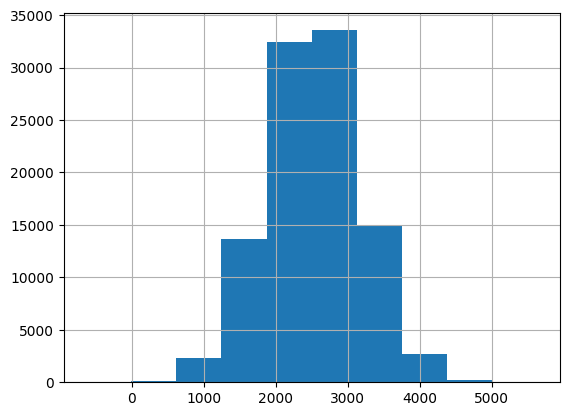

In [15]:
outcomes.hist()

With betting a fixed size, the rate of return is lower and the risk of going broke doesn't go away. So it's sub-optimal.

### Random Walks
Imagine going on a walk. Every time you get to an intersection, you flip a coin. If it's heads, you go one block north and one block east. If it's tails, you go one block south and one block east. This is called a random walk. If going north is making profits, and south is losing profits, it's a bit like a bettor's profits or losses plotted on a graph.

The vig kinda breaks the analogy, because you can't go 1.1 blocks south when you lose. But you could do it in a big field.

I think there's a huge value in knowing what random walks look like. Do they remind you of anything?

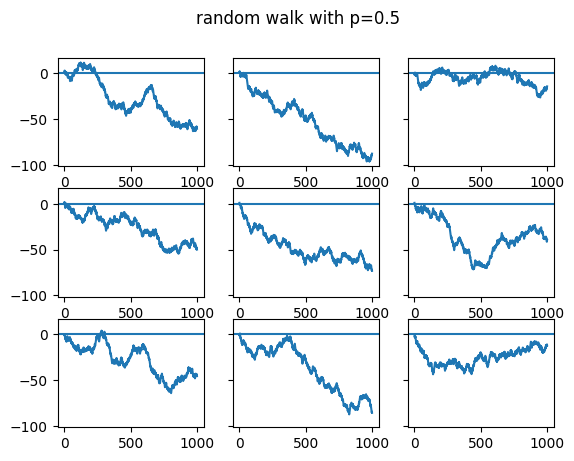

In [16]:
from random_walk import RandomWalk
rw = RandomWalk()
rw.plot_random_walk(.5)

These could be 1000 bets at 50% win rate and a -110 vig. Once in a blue moon, a gambler like this might finish with more money when they started with. But usually, they end up down massively at the end of the season.

Here's the same thing at a 54.1% win rate, like one professional pick seller I discuss later on.

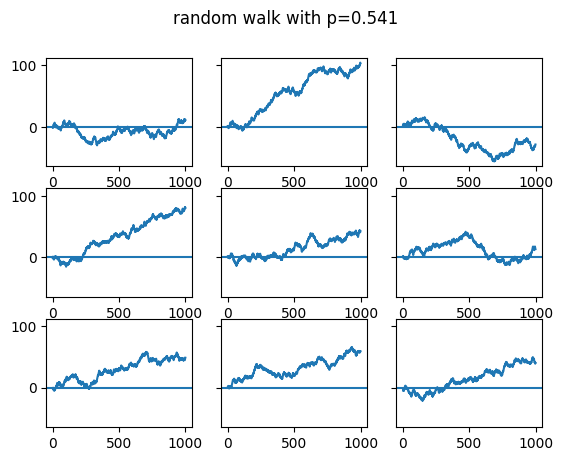

In [17]:
rw.plot_random_walk(.541)

Most of them ended up +50 units after 1000 bets, which is pretty good. But a couple of them ended up being losers, even with the advantage.  The pick sellers I looked at don't sell picks for every single game. So with 1200 games in an NBA season, this could be several years' worth of results.

Imagine all of these as 9 different handicappers. They all have the exact same level of skill at picking games. But some of them look like geniuses, and some look like bozos.

You don't get to choose which of these random walks you actually get. If each bet has a 54.1% chance of winning, there's no guarantee you will have exactly 541 wins and 459 losses at the end of 1000 bets.

Finally, here is someone who is right 60% of the time. Success is pretty boring.

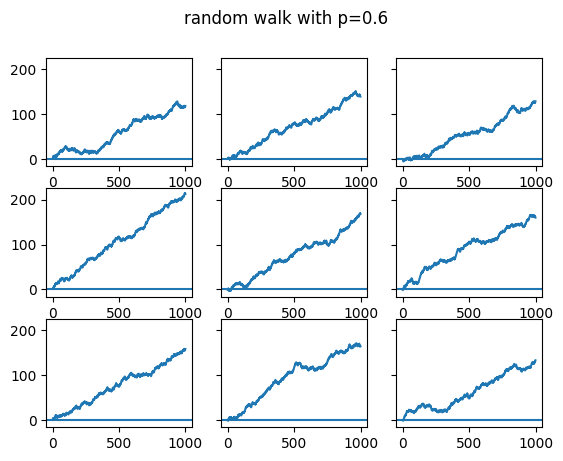

In [19]:
rw.plot_random_walk(.6)

I've always said it's much harder to learn from success than from failure. At a 60% win rate, none of them really have long cold streaks, just small breaks between hot streaks.  It would be boring to tell stories about those graphs.

The graphs at 54.1% success rate appear a lot more human. They have hot and cold streaks, swoons, periods where they seem stuck in a range of values. Some of them *scuffled the whole time*, a couple *finally got locked in near the end*, a couple were *consistently good*. Even though they are randomly generated, they look like they have more to teach us, like they offer more opportunities to tell stories. But they all have the exact same win rate, or level of skill at handicapping.

No outcome is guaranteed, but the higher the win rate, the more consistently the graph is going to go up and to the right at a steady pace. This shows why being a stickler about the vig and getting the best line possible is so important -- it increases both the profits and the consistency of outcomes.

Finally, here are some walks at 52.4% win rate, the break-even point. Most results end up close to zero after 1000 bets, but there is always a possibility of an extended run towards the positive or negative side.

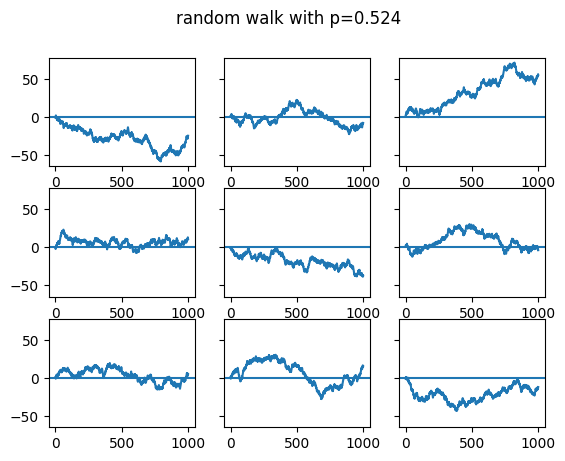

In [20]:
rw.plot_random_walk(.524)

### The Axe Forgets, The Tree Remembers
If the 9 graphs were stock prices, which one would you consider the best investment? 

Well, we know they're equally bad investments. All have the same expected value moving forwards, which is zero, because they're winning just enough to pay the vig, but not make profits.

The previous results are meaningless and have no bearing on whether the next step will be up or down. Every step is essentially a new random walk. The coin doesn't remember what has happened in the past. We do.

This is what's known in math as a Martingale, named after a "betting system" that was popular in France hundreds of years ago. The basic idea behind all these betting systems is to "chase" losses by betting more when you're losing.

Hopefully it's obvious that these chase systems are crazy, though formally proving it led to a lot of interesting math. 


### The Gambler's Ruin

If each bet you make has a negative expected value, you can't fix that by betting MORE. People do these chase systems on paper and end up taking million dollar bets to try to get out of a million dollar hole. "If I keep doubling down, eventually I'll win it all back." Maybe if you have infinite capital and unlimited time. 

Otherwise the [Gambler's Ruin](https://en.wikipedia.org/wiki/Gambler%27s_ruin) is certain. The market can stay liquid longer than you can stay irrational.

There are many paradoxical things that happen on random walks, a lot of bad neighborhoods you might find yourself in. The longer you random walk, the higher the chances you end up in a bad part of town.

So maybe the fact that your chances of ruin go up the longer you Kelly bet should not be all that surprising.

## Streaks

Streaks of wins and losses are really common. This is one of those places where our intuitive notion of randomness and actual randomness collide. Imagine I asked you to try and randomly write a sequence of "W"'s and "L"'s to simulate a team's win-loss record. I could probably tell that it was fake. You might get the winning percentage correct, but your results would probably be less "streaky" than an actual sequence of winners. [Joseph Buchdal](https://www.football-data.co.uk/blog/Wald_Wolfowitz.php) actually did an experiment, and found that he couldn't create a win-loss record that would fool a statistical test called the Wald-Wolfowitz runs test.

Streaks of wins and losses in randomly generated data follow regular mathematical laws, ones our brains don't want to follow when asked to do the exercise. At some level, we're almost physically incapable of generating truly random data, so it makes sense to me that our intuitions about randomness are a little off.

To see this in action, let's generate some streaks.

In [36]:
import re

rng = np.random.default_rng(2718)

def streaks(skill=.5, season_length=1000):
    # this will give us 1's and zeroes
    fake_season = pd.Series(np.random.rand(season_length) < skill).astype("float")
    as_win_loss = fake_season.replace(0.0, "L").replace(1.0, "W")
    as_str = "".join(as_win_loss)
    win_streaks  = re.findall(r"(W{1,}+)", as_str)
    lose_streaks = re.findall(r"(L{1,}+)", as_str)

    win_lengths = pd.Series(map(len, win_streaks))
    lose_lengths = pd.Series(map(len, lose_streaks))

    return {
        'win_lengths': win_lengths.value_counts(),
        'lose_lengths': lose_lengths.value_counts(),
        'win_streaks': win_streaks,
        'lose_streaks': lose_streaks,
        'wins': as_str.count("W"),
        'losses': as_str.count("L")
        }

First off, a mathematical intuition check. Does the win rate affect the number of winning versus losing streaks? A team or a gambler that is good will have fewer losing streaks, right?

In one sense, yes, in another, no. There can be at most one more winning streak than losing streak no matter the win rate. Every time a winning streak ends, a losing streak begins, and vice versa. So they're sort of paired up.

But there will definitely be fewer streaks total as the win rate goes up. The winning streaks will be longer, the losing streaks shorter. There will be fewer opportunities for the winners to metaphorically pass the baton to the losers, and vice versa.

How many streaks is "reasonable" for randomly-generated data? Consider two sequences:

* The sequence "WLWLWL" has 6 streaks
* The sequence "WWLLWL" has 4 streaks

If I asked you to generate a random string of 3 W's and 3 L's, which one is more likely to be your answer? Probably the first one, right?

Based on the Wald-Wolfowitz test, the first sequence has more streaks than would be expected by chance. Even though it looks more random, it's less likely to come from a truly random process. It's not streaky enough.

The process of creating the first sequence would be simpler to explain, right? Just alternate W's and L's the whole time. You wouldn't have to specify each letter. The second one, there's no obvious algorithm that could generate it. In that sense, it's definitely more random -- it's less *compressible*.

This is a short, contrived example, but over the course of hundreds of results, the range of reasonable values for the number of streaks gets really tight.


Let's simulate a season of results. 

Over the course of this simulated 1000 game season, we get 492 streaks, roughly half the number of total games.

The minimum possible number of runs would be 2 (all the W's followed by all the L's). The maximum would be $ (2 * losses) + 1$. Start by alternating W's and L's until we run out of L's, then all W's at the end.

In [37]:
ok_bettor_season = streaks(skill=.55, season_length=1000)
len(ok_bettor_season['win_streaks']) + len(ok_bettor_season['lose_streaks'])

492

In [38]:
print(ok_bettor_season['wins'])
print(ok_bettor_season['losses'])

568
432


In this simulation, the bettor went 524-476. We can plug those into the formula for the runs test, which is

$$runs = \frac{2 * wins * losses}{games} + 1$$

In [39]:
((2 * 568 * 432) / 1000) + 1

491.752

You can't have a fractional number of runs, so should round that number up to 492.

The actual number of runs could have been anywhere between 2 and 865, and it was exactly 492, as predicted. Kinda cool, right?

This statistical test has been used to try to prove or disprove the "hot hand" -- the idea that some basketball shooters are streaky. When streaky shooters are "hot" or "feeling it", they are more likely to make the next shot than they would normally. They could also have cold streaks, where they seem to miss more than often.

A streaky shooter would have more makes in a row and more misses in a row than expected by chance. It's the opposite situation from asking somebody to write out a random-looking sequence of W's and L's where they avoid long streaks because they look less random. A streaky shooter is like someone who is bored with the exercise and writes a bunch of W's, then a bunch of L's, and so on, to get it done with as easily as possible.


### The Earl of Swish

Although [the original paper](https://www.sciencedirect.com/science/article/abs/pii/0010028585900106) found that the hot hand doesn't exist, it has remained a topic of debate for decades, one that I'm a little afraid to wade into here!

The one idea I would contribute is: if a *streaky* shooter (I always think of J.R. Smith) has 2 hot and cold phases, or maybe hot, cold, and normal, how different could the levels be? 

It's not the JR stands for "Jumpshooting Robot", with an LED on the side telling us what mode he's in. How do you know which J.R. you're getting tonight? That's a good question, something fans and coaches of every team he played for have surely asked at one time. I would contend that "good JR" can't be that much better than "bad JR". 

Is it really plausible that "Good JR" could make 100% of his 3 pointers? The best 3 point shooters in history still make less than 50% of their attempts. Doesn't that kind of set the upper bound for how good JR could be when he's hot? 

Say he goes 8/8 in the game from 3. That doesn't mean the probability of him making each one was 100%. A coin with a 40% chance of coming up heads will go 8/8 every once in a while. There's nothing in the rulebook that says they can't do that. Coins are not capable of switching between "hot" and "cold" modes, though our brains might want to fit that story to the data.

Maybe "hot JR" is the greatest 3 point shooter of all time, and he can make them over 50% of the time. That doesn't seem totally crazy. But I don't believe he's shooting 100% or even 70% when he is *hot*. It implies that JR could always shoot 70% or some other number far better than anyone in history if he could just get himself into the right mental state every game. This mental state would have to be one that no other player in NBA history can get to, some secret room only JR has the key to.

"Cold JR" shooting 0% is less crazy, because it's easy to miss a shot if you're not trying to make one. Though I have seen players trying to intentionally miss a free throw at the end of the game and accidentally make it. Maybe JR's unconscious could be sabotaging him during these "cold" periods and causing him to miss everything. But I think people are more focused on when a guy is hot, even though that implies other periods of coldness exist to even out to the player's season average.

Even under the "hot JR"/"cold JR" hypothesis, the streaks are still partially a product of chance, not solely due to some change in JR's internal state. 

### The Announcer's Jinx
As a fan of the game, I certainly understand feeling like JR Smith, or some other player, is on a shooting streak. There's a part of my brain that wants to say, "do you even watch the games, nerd?" to people questioning its existence. Is it feel or is it real? 

An example of feel over real is the announcer's jinx. This is the belief that if the TV announcer remarks that a player has made their last *n* free throws, they're more likely to miss the next one.

Unless the player shooting the free throws could hear the announcer saying it, there's no way that the announcer's words could affect the outcome of the game. And yet, when it happens, our brains are inclined to think the two things are connected, and the announcer jinxed the player.

It's worth remembering that our brains are just story making machines made out of electrified meat. It's no surprise we err on the side of seeing patterns where none exist. The randomness of the world is less *compressible* than a simple story is.

### Expectations about Streaks

How frequently will a 55% win rate gambler see different length streaks over the course of 1000 bets on the NBA? We can simulate a whole bunch of games, and then calculate the number of expected streaks in 1000 games. That's a whole NBA season of betting on nearly all the games.

In [41]:
ok_bettor = streaks(skill=.55, season_length=10000000)
win_streak_ev = ok_bettor['win_lengths'] / 10000
win_streak_ev

1     111.3162
2      61.2831
3      33.7006
4      18.5079
5      10.1644
6       5.6416
7       3.0635
8       1.7188
9       0.9322
10      0.5070
11      0.2880
12      0.1581
13      0.0858
14      0.0491
15      0.0257
16      0.0147
17      0.0090
18      0.0041
19      0.0028
20      0.0010
21      0.0006
23      0.0005
22      0.0004
24      0.0002
28      0.0002
Name: count, dtype: float64

A bettor should expect about 10 five game winning streaks, and 12 streaks between 6 and 12 games long. Streaks longer than 12 happen about once every five years.

In [42]:
sum(win_streak_ev[win_streak_ev.index > 5])

12.5033

In [43]:
sum(win_streak_ev[win_streak_ev.index > 12])

0.1941

On the losing side, a pretty good bettor should expect around 5 stretches every season where they lose 6 or more games in a row.

In [44]:
lose_streak_ev = ok_bettor['lose_lengths'] / 10000
lose_streak_ev

1     136.1457
2      61.2093
3      27.6286
4      12.3621
5       5.5730
6       2.5113
7       1.1310
8       0.5012
9       0.2265
10      0.1007
11      0.0440
12      0.0236
13      0.0106
14      0.0049
15      0.0020
16      0.0004
17      0.0003
19      0.0002
18      0.0002
Name: count, dtype: float64

In [45]:
sum(lose_streak_ev[lose_streak_ev.index >= 6])

4.5569

### Nothing's stopping you from losing it all

[TODO: write this]

In the kingdom of randomness, anything that is possible will happen eventually.

I always think of the screen savers on DVD players. This is definitely a generational thing. But if you left a DVD player alone too long, it would show a logo bouncing around the screen. Once in a blue moon, the DVD logo would hit one of the corners of the screen exactly. There are few things that provoke universal happiness in people, and the logo hitting the corner is number one. There's a reason why it's the #1 suggested search term for "DVD":

![dvd](img/dvd.png)

How can you know if it will ever hit the corner? Couldn't some bastard code it up so it never does? Maybe it's a cheap DVD player and they did the math wrong.

What if we were using the DVD logo to map the shape of the TV screen? Every time it bounces off, we know there's a wall there. If the logo never hits the corner, how would we know it's there?

[TODO ugh finish this]



There are two competing forces here: in the short term, super crazy things can happen

aagh. come back to this.

* ergodicity
* the screen saver on old dvd's, will it hit every part of the square.